# Midterm Project

Mauricio Garcia 11/19/19

## Abstract

In this midterm project, I combine pandas, visualisations and operations to perform some calculations and observe the results of the relationship between burning and consumption of plants to CO2 emissions. Here are two questions we will relate to CO2 emissions:
- What was the burn area?
- How many tons of plants were consumed?

## Data Exploration

For this project, I chose to explore and thoroughly analyze the contents of a file that is about controlled fires. I will prepare my data by opening and taking a look in it to see if I need to make any changes so my data is useable

In [77]:
# Import all the modules for this lab here
import math as m
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# and open my file here
df = pd.read_csv("DNR_Completed_Prescribed_Burns.csv")
df

,PERMIT_NO,BURN_TYPE,ACTUAL_BURN_DATE,ACTUAL_BURN_TIME,ACTUAL_BURN_AREA,ACTUAL_TONS_CONSUMED,SHRUB_CONSUMPTION,CANOPY_CONSUMPTION,PILE_CONSUMPTION,ACTUAL_BURN_DURATION,...,GRASS_FL,ROTTEN_FL,DUFF_DEPTH,LITTER_DEPTH,SLOPE,FM_DUFF,FM10,FM1000,RAIN,WIND_SPD
0,40000001277,Understory,05/02/2018,NaN,0,1.0,NaN,NaN,NaN,NaN,...,0.6,1.0,0.25,0.7,45.0,1.0,0.0,0.0,0.0,0.0
1,SP20150013,Mechanical Piles,01/04/2017,08:00,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NE20170034,Mechanical Piles,02/09/2017,09:30,9,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SE20170163,Mechanical Piles,05/19/2017,09:30,24,45.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SE20170205,Mechanical Piles,10/26/2017,08:00,9,99.0,NaN,NaN,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SE20170222,Mechanical Piles,11/07/2017,09:30,26,33.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NW20171048,Mechanical Piles,11/20/2017,09:00,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NW20171048,Mechanical Piles,12/05/2017,08:00,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NW20171083,Mechanical Piles,11/27/2017,09:00,5,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NE20170522,Mechanical Piles,12/20/2017,09:30,30,61.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# I'm going to be running info and describe below to see more information
df.describe()

,ACTUAL_BURN_AREA,ACTUAL_TONS_CONSUMED,SHRUB_CONSUMPTION,CANOPY_CONSUMPTION,PILE_CONSUMPTION,ACTUAL_BURN_DURATION,LATITUDE,LONGITUDE,TWN,RNG,...,GRASS_FL,ROTTEN_FL,DUFF_DEPTH,LITTER_DEPTH,SLOPE,FM_DUFF,FM10,FM1000,RAIN,WIND_SPD
count,5527.000000,5487.000000,3.000000,2.000000,914.000000,1099.000000,5527.000000,5527.000000,5527.000000,5527.000000,...,263.000000,146.000000,376.000000,355.000000,1482.000000,866.000000,863.000000,866.000000,864.000000,865.000000
mean,28.148001,99.137598,23.666667,5.500000,85.888403,216.050045,47.529781,-120.709522,23.704722,19.016374,...,0.711407,1.391781,0.627979,1.068732,20.966262,1.391455,13.216686,19.614319,4.366898,2.946821
std,54.239811,261.284391,24.704925,6.363961,11.327864,173.431236,1.108129,8.594272,10.428098,15.686630,...,0.607651,1.424394,0.539767,1.014810,14.056467,0.775564,10.020309,14.270596,8.249070,2.542134
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-124.679372,1.000000,1.000000,...,0.100000,0.200000,0.020000,0.100000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,26.000000,10.500000,3.250000,80.000000,120.000000,46.845324,-123.045937,16.000000,5.000000,...,0.100000,0.800000,0.200000,0.500000,10.000000,1.000000,8.000000,12.000000,0.000000,2.000000
50%,10.000000,30.000000,20.000000,5.500000,85.000000,200.000000,47.775000,-121.766639,26.000000,13.000000,...,0.800000,1.000000,0.400000,0.900000,20.000000,1.000000,12.000000,19.000000,2.000000,3.000000
75%,33.000000,88.000000,35.000000,7.750000,90.000000,300.000000,48.223190,-118.000000,32.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,18.000000,25.000000,6.000000,4.000000
max,1000.000000,7543.000000,50.000000,10.000000,100.000000,3000.000000,48.997558,124.143127,41.000000,46.000000,...,4.000000,7.000000,3.000000,11.000000,90.000000,3.000000,100.000000,100.000000,100.000000,20.000000


In [80]:
# Here is some information on this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5527 entries, 0 to 5526
Data columns (total 48 columns):
PERMIT_NO               5527 non-null object
BURN_TYPE               5527 non-null object
ACTUAL_BURN_DATE        5527 non-null object
ACTUAL_BURN_TIME        5436 non-null object
ACTUAL_BURN_AREA        5527 non-null int64
ACTUAL_TONS_CONSUMED    5487 non-null float64
SHRUB_CONSUMPTION       3 non-null float64
CANOPY_CONSUMPTION      2 non-null float64
PILE_CONSUMPTION        914 non-null float64
ACTUAL_BURN_DURATION    1099 non-null float64
LATITUDE                5527 non-null float64
LONGITUDE               5527 non-null float64
TWN                     5527 non-null int64
TWND                    5527 non-null object
RNG                     5527 non-null float64
RNGD                    5527 non-null object
SEC                     5527 non-null int64
ELEV                    2648 non-null float64
LANDOWNER               5527 non-null object
STATE                   5527 non-null o

It seems to me that there are 5527 entries in this dataset and I am also aware that some columns have a very small amount of entries. I'm going to clean up this data by renaming columns I'll use.

In [81]:
# Here, I drop a column of information.
df.rename(columns={'ACTUAL_BURN_AREA':'Burn area','ACTUAL_TONS_CONSUMED':'Tons consumed','ACTUAL_TONS_CONSUMED':'Tons consumed'}, inplace=True)
df

,PERMIT_NO,BURN_TYPE,ACTUAL_BURN_DATE,ACTUAL_BURN_TIME,Burn area,Tons consumed,SHRUB_CONSUMPTION,CANOPY_CONSUMPTION,PILE_CONSUMPTION,ACTUAL_BURN_DURATION,...,GRASS_FL,ROTTEN_FL,DUFF_DEPTH,LITTER_DEPTH,SLOPE,FM_DUFF,FM10,FM1000,RAIN,WIND_SPD
0,40000001277,Understory,05/02/2018,NaN,0,1.0,NaN,NaN,NaN,NaN,...,0.6,1.0,0.25,0.7,45.0,1.0,0.0,0.0,0.0,0.0
1,SP20150013,Mechanical Piles,01/04/2017,08:00,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NE20170034,Mechanical Piles,02/09/2017,09:30,9,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SE20170163,Mechanical Piles,05/19/2017,09:30,24,45.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SE20170205,Mechanical Piles,10/26/2017,08:00,9,99.0,NaN,NaN,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SE20170222,Mechanical Piles,11/07/2017,09:30,26,33.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NW20171048,Mechanical Piles,11/20/2017,09:00,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NW20171048,Mechanical Piles,12/05/2017,08:00,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NW20171083,Mechanical Piles,11/27/2017,09:00,5,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NE20170522,Mechanical Piles,12/20/2017,09:30,30,61.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Modeling

The first question I will address is the average amount of tons consumed in these controlled fires.

In [82]:
# Here, I will calculate for the mean of the tons consumed
df.mean()

Burn area                 28.148001
Tons consumed             99.137598
SHRUB_CONSUMPTION         23.666667
CANOPY_CONSUMPTION         5.500000
PILE_CONSUMPTION          85.888403
ACTUAL_BURN_DURATION     216.050045
LATITUDE                  47.529781
LONGITUDE               -120.709522
TWN                       23.704722
RNG                       19.016374
SEC                       18.320246
ELEV                    1910.173338
PM25                       5.974093
PM10                       6.482662
PM                         8.935319
CO                        74.803755
CO2                      923.580236
CH4                        2.936383
NMHC                       2.041893
FWD1                       0.885027
FWD2                       2.165635
FWD3                       2.365000
CWD1                       4.203211
CWD2                       1.560586
CWD3                       1.456034
SHRUB_FL                   1.489306
GRASS_FL                   0.711407
ROTTEN_FL                  1

The average tons consumed is almost 100, but I want to see if there is a relationship between the tons consumed and the CO2 emissionns as well.

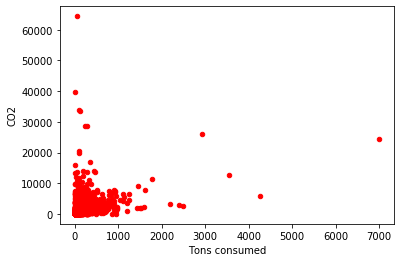

In [83]:
# I make a plot here
df.plot(kind='scatter',x='Tons consumed',y='CO2',color='red')
plt.show()

## Data Analysis

In [84]:
# Let's make a run through of the sum of the area burned
df.sum()

PERMIT_NO               40000001277SP20150013NE20170034SE20170163SE201...
BURN_TYPE               UnderstoryMechanical PilesMechanical PilesMech...
ACTUAL_BURN_DATE        05/02/201801/04/201702/09/201705/19/201710/26/...
Burn area                                                          155574
Tons consumed                                                      543968
SHRUB_CONSUMPTION                                                      71
CANOPY_CONSUMPTION                                                     11
PILE_CONSUMPTION                                                    78502
ACTUAL_BURN_DURATION                                               237439
LATITUDE                                                           262697
LONGITUDE                                                         -667162
TWN                                                                131016
TWND                    NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
RNG                                   

Once again, I will be making a simple scatter plot to relate the burned area with CO2

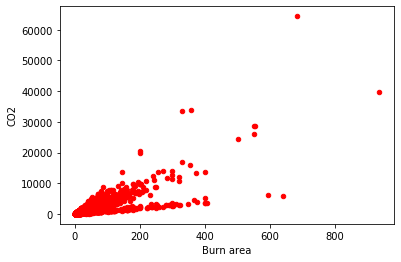

In [85]:
# and we repeat the proccess like before
df.plot(kind='scatter',x='Burn area',y='CO2',color='red')
plt.show()

## Conclusions

In this lab, there were some interesting things I found out. Initially, I was expecting CO2 emissions to be very much directly proportional to the amount burned and the tons of plants consumed. I was surprised to realize that as burn area and consumption increases, CO2 emissions get smaller. It was also difficult to get a couple of things done on this lab such as organizing NaN rows, so I took an easier route of performing simple calculation and using pandas to plot and open up files.

## Acknowledgments

I want to thank Ms. Sconyers for providing code as well as quierozf.com for providing code to plot my data